In [24]:
import matplotlib.pyplot as plt
import gmaps
import pandas as pd
import numpy as np
from scipy.stats import linregress
import scipy.stats as st
import json
import requests

# Google developer API key
from api_keys import gkey
from api_keys import weather_api_key

# Configure gmaps
gmaps.configure(api_key=gkey)

In [25]:
# Create weather dataframe
area_df = pd.read_csv('cities.csv')
area_df.dropna(inplace = True) 
area_df.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


In [26]:
# Store latitude and longitude in locations
locations = area_df[["Lat", "Lng"]]

# Fill NaN values and convert to float
temp = area_df["Max Temp"].astype(float)

In [27]:
# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=temp, 
                                 dissipating=False, max_intensity=10,
                                 point_radius=1)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [29]:
# Post as a Hybrid map
fig = gmaps.figure(map_type="HYBRID")

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=temp, 
                                 dissipating=False, max_intensity=10,
                                 point_radius=1)

fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [9]:
file = "cities.csv"
data = pd.read_csv(file)
df = pd.DataFrame(data)

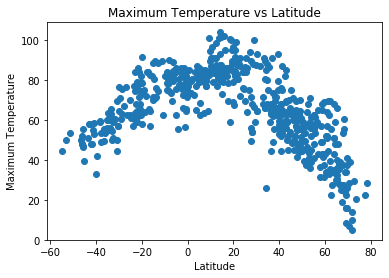

Temperature is at its highest between 0 and 10 latitude


In [16]:
plt.scatter(df["Lat"], df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")
plt.title("Maximum Temperature vs Latitude")

plt.show()
print("Temperature is at its highest between 0 and 10 latitude")

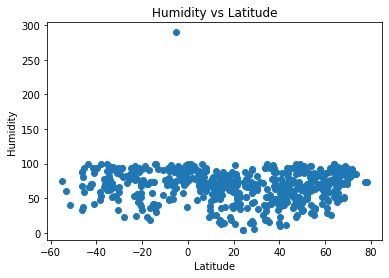

Between 0 and 40 latitude, there is a slight decrease in humidity


In [17]:
plt.scatter(df["Lat"], df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity vs Latitude")

plt.show()
print("Between 0 and 40 latitude, there is a slight decrease in humidity")

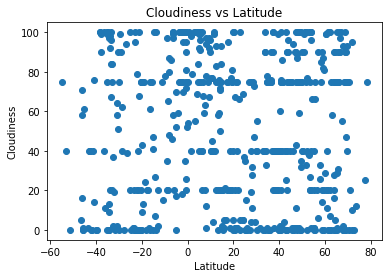

The data is inconclusive on wether latitude affects cloudiness


In [18]:
plt.scatter(df["Lat"], df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness vs Latitude")

plt.show()
print("The data is inconclusive on wether latitude affects cloudiness")

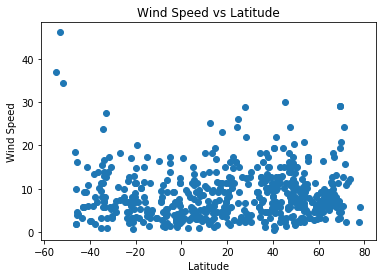

With the exception of a few outliers, the data is inconclusive on whether latitude affects wind speed


In [19]:
plt.scatter(df["Lat"], df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed vs Latitude")

plt.show()
print("With the exception of a few outliers, the data is inconclusive on whether latitude affects wind speed")

In [35]:
# Split Northern and Southern hemispheres

northern_df = area_df.loc[pd.to_numeric(area_df["Lat"]).astype(float) > 0, :]
southern_df = area_df.loc[pd.to_numeric(area_df["Lat"]).astype(float) < 0, :]

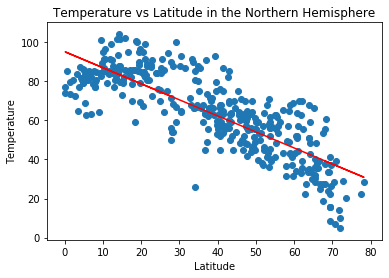

In [43]:
# Northern Hemisphere - Temperature vs Latitude

x_values = pd.to_numeric(northern_df["Lat"]).astype(float)
y_values = pd.to_numeric(northern_df["Max Temp"]).astype(float)

regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Temperature vs Latitude in the Northern Hemisphere")
plt.scatter(x_values,y_values)

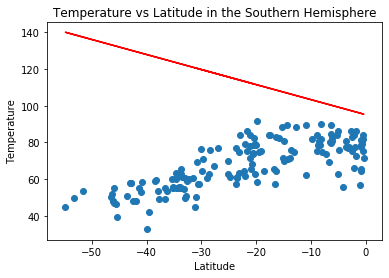

In [46]:
# Southern Hemisphere - Temperature vs Latitude

x_values = pd.to_numeric(southern_df["Lat"]).astype(float)
y_values = pd.to_numeric(southern_df["Max Temp"]).astype(float)

regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Temperature vs Latitude in the Southern Hemisphere")
plt.scatter(x_values,y_values)

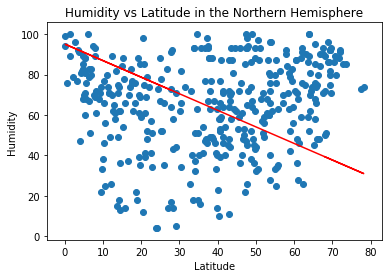

In [47]:
# Northern Hemisphere - Humidity vs Latitude

x_values = pd.to_numeric(northern_df["Lat"]).astype(float)
y_values = pd.to_numeric(northern_df["Humidity"]).astype(float)

regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity vs Latitude in the Northern Hemisphere")
plt.scatter(x_values,y_values)

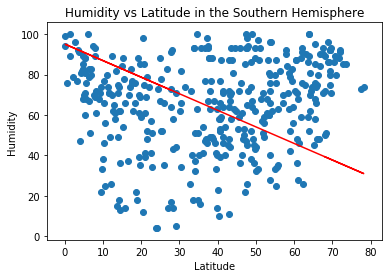

In [48]:
# Southern Hemisphere - Humidity vs Latitude

x_values = pd.to_numeric(northern_df["Lat"]).astype(float)
y_values = pd.to_numeric(northern_df["Humidity"]).astype(float)

regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity vs Latitude in the Southern Hemisphere")
plt.scatter(x_values,y_values)

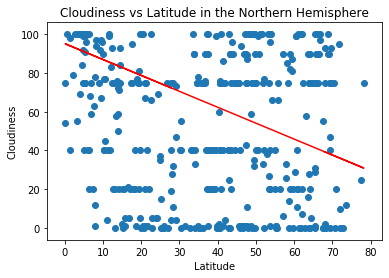

In [49]:
# Northern Hemisphere - Cloudiness vs Latitude

x_values = pd.to_numeric(northern_df["Lat"]).astype(float)
y_values = pd.to_numeric(northern_df["Cloudiness"]).astype(float)

regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness vs Latitude in the Northern Hemisphere")
plt.scatter(x_values,y_values)

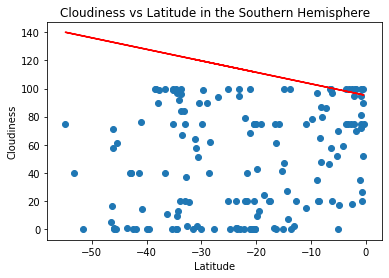

In [50]:
# Southern Hemisphere - Cloudiness vs Latitude

x_values = pd.to_numeric(southern_df["Lat"]).astype(float)
y_values = pd.to_numeric(southern_df["Cloudiness"]).astype(float)

regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness vs Latitude in the Southern Hemisphere")
plt.scatter(x_values,y_values)

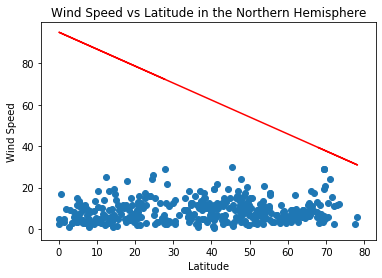

In [51]:
# Northern Hemisphere - Wind Speed vs Latitude

x_values = pd.to_numeric(northern_df["Lat"]).astype(float)
y_values = pd.to_numeric(northern_df["Wind Speed"]).astype(float)

regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed vs Latitude in the Northern Hemisphere")
plt.scatter(x_values,y_values)

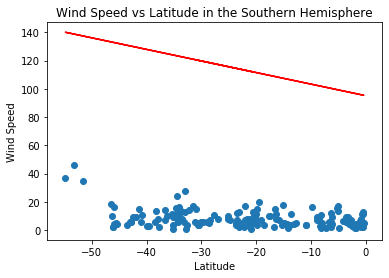

In [52]:
# Southern Hemisphere - Wind Speed vs Latitude

x_values = pd.to_numeric(southern_df["Lat"]).astype(float)
y_values = pd.to_numeric(southern_df["Wind Speed"]).astype(float)

regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed vs Latitude in the Southern Hemisphere")
plt.scatter(x_values,y_values)